In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("halaturkialotaibi/coffee-bean-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HOss\.cache\kagglehub\datasets\halaturkialotaibi\coffee-bean-sales-dataset\versions\2


In [48]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "DatasetForCoffeeSales2.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.isnull().sum()

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64

In [78]:
# split our data 
num = df.select_dtypes('number')
cat = df.select_dtypes('object')

In [79]:
num.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Discount_Amount,Final Sales,Discount_Percentage,Month,Year
0,0,32,8,0,1,40,14,560,0,560,0.0,1,2023
1,1,49,0,0,2,35,17,595,0,595,0.0,1,2023
2,2,75,9,0,2,35,19,665,0,665,0.0,1,2023
3,3,80,0,0,3,45,1,45,0,45,0.0,1,2023
4,4,78,3,0,1,40,46,1840,368,1472,20.0,1,2023


In [80]:
cat.head()

,Month_Name,Day_Name
0,January,Sunday
1,January,Monday
2,January,Tuesday
3,January,Wednesday
4,January,Thursday


In [81]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Extract Year, Month Name, and Day Name from Date column
df["Year"] = df["Date"].dt.year
df["Month_Name"] = df["Date"].dt.strftime("%B")  # Full month name
df["Day_Name"] = df["Date"].dt.strftime("%A")  # Full day name

# Display sample data to verify the new columns
df[["Date", "Year", "Month_Name", "Day_Name"]].head()


ValueError: time data "0" doesn't match format "%m/%d/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 730 non-null    datetime64[ns]
 1   Customer_ID          730 non-null    int64         
 2   City                 730 non-null    object        
 3   Category             730 non-null    object        
 4   Product              730 non-null    object        
 5   Unit Price           730 non-null    int64         
 6   Quantity             730 non-null    int64         
 7   Sales Amount         730 non-null    int64         
 8   Used_Discount        730 non-null    bool          
 9   Discount_Amount      730 non-null    int64         
 10  Final Sales          730 non-null    int64         
 11  Discount_Percentage  730 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 63.6+ KB


# Visualise

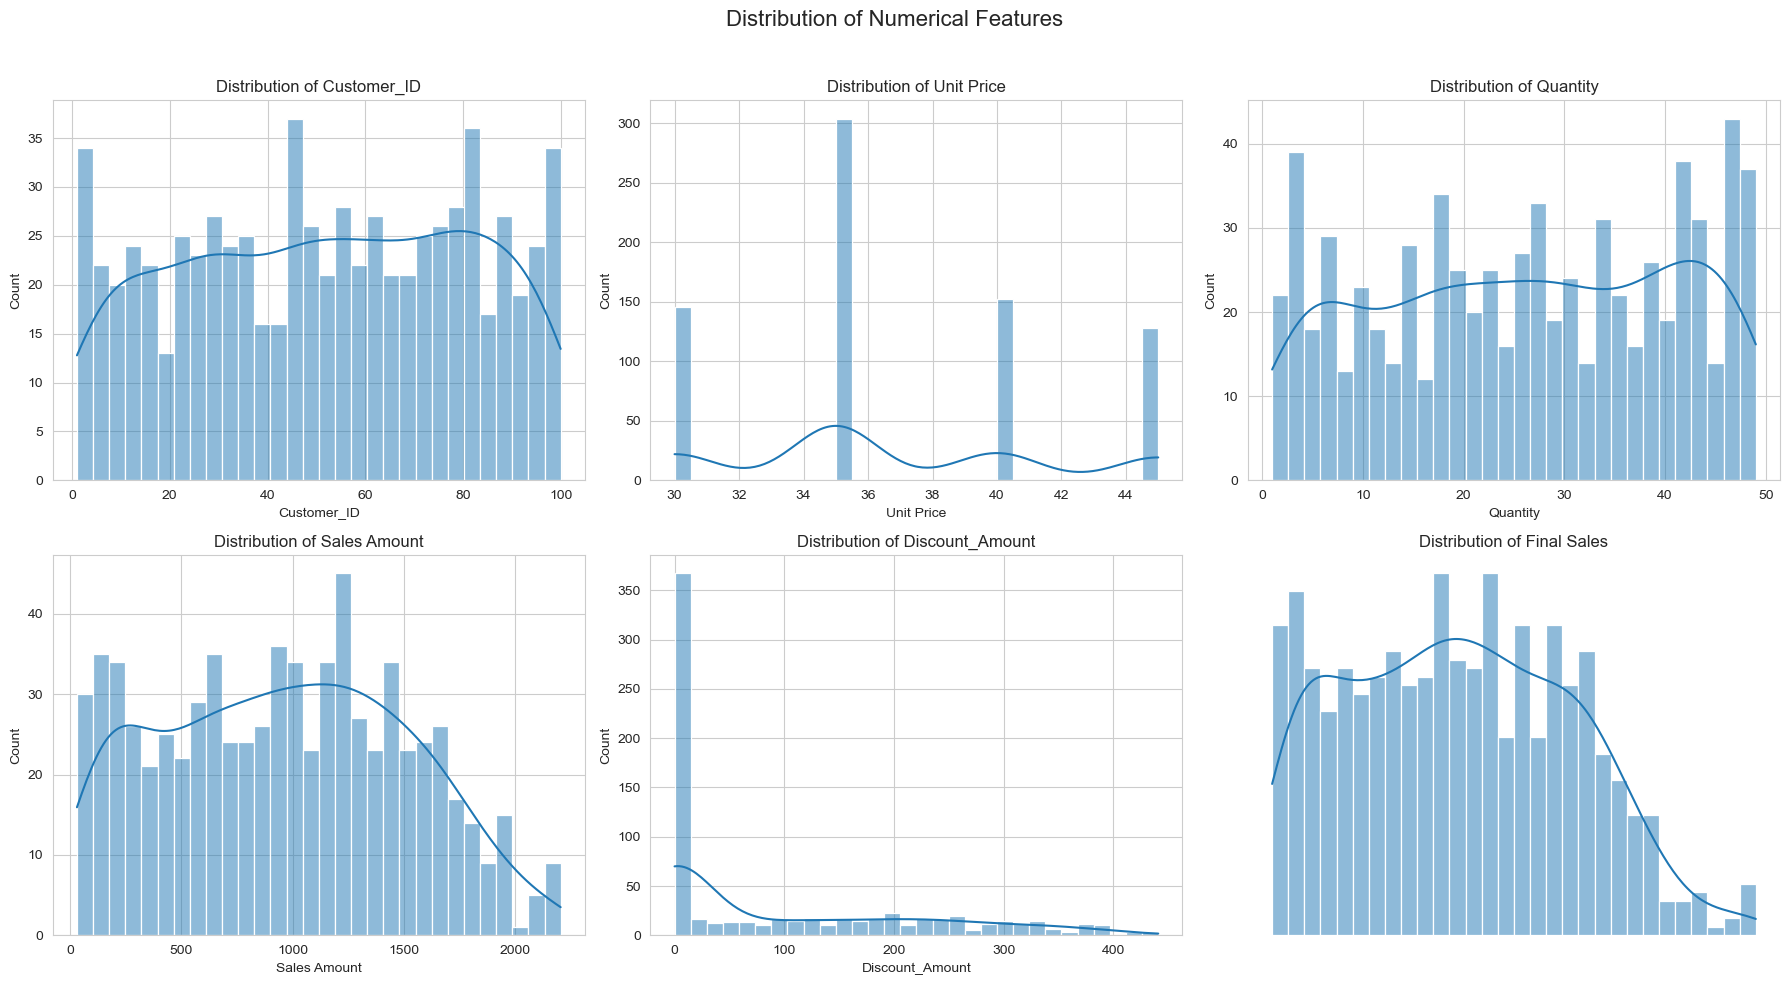

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Distribution of Numerical Features", fontsize=16)

for i, col in enumerate(num):
    row, col_pos = divmod(i, 3)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f"Distribution of {col}")

# Hide empty subplot
axes[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


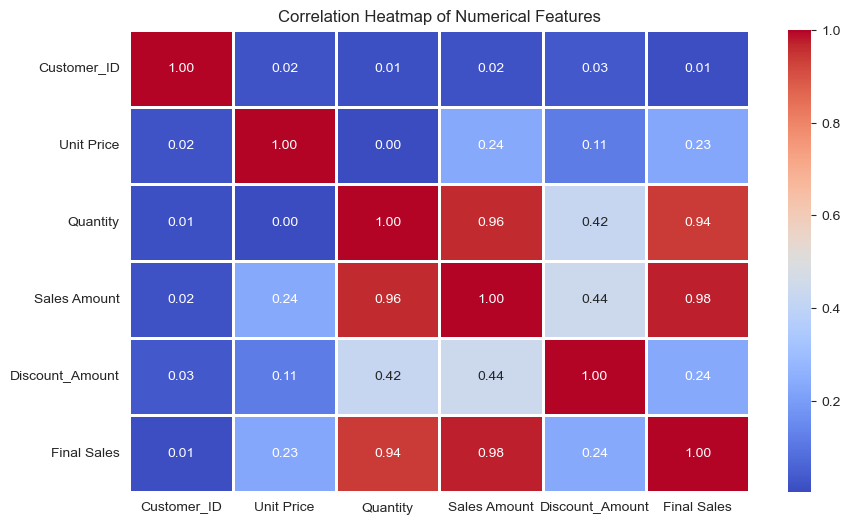

In [34]:
# Compute correlation matrix
corr_matrix = num.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


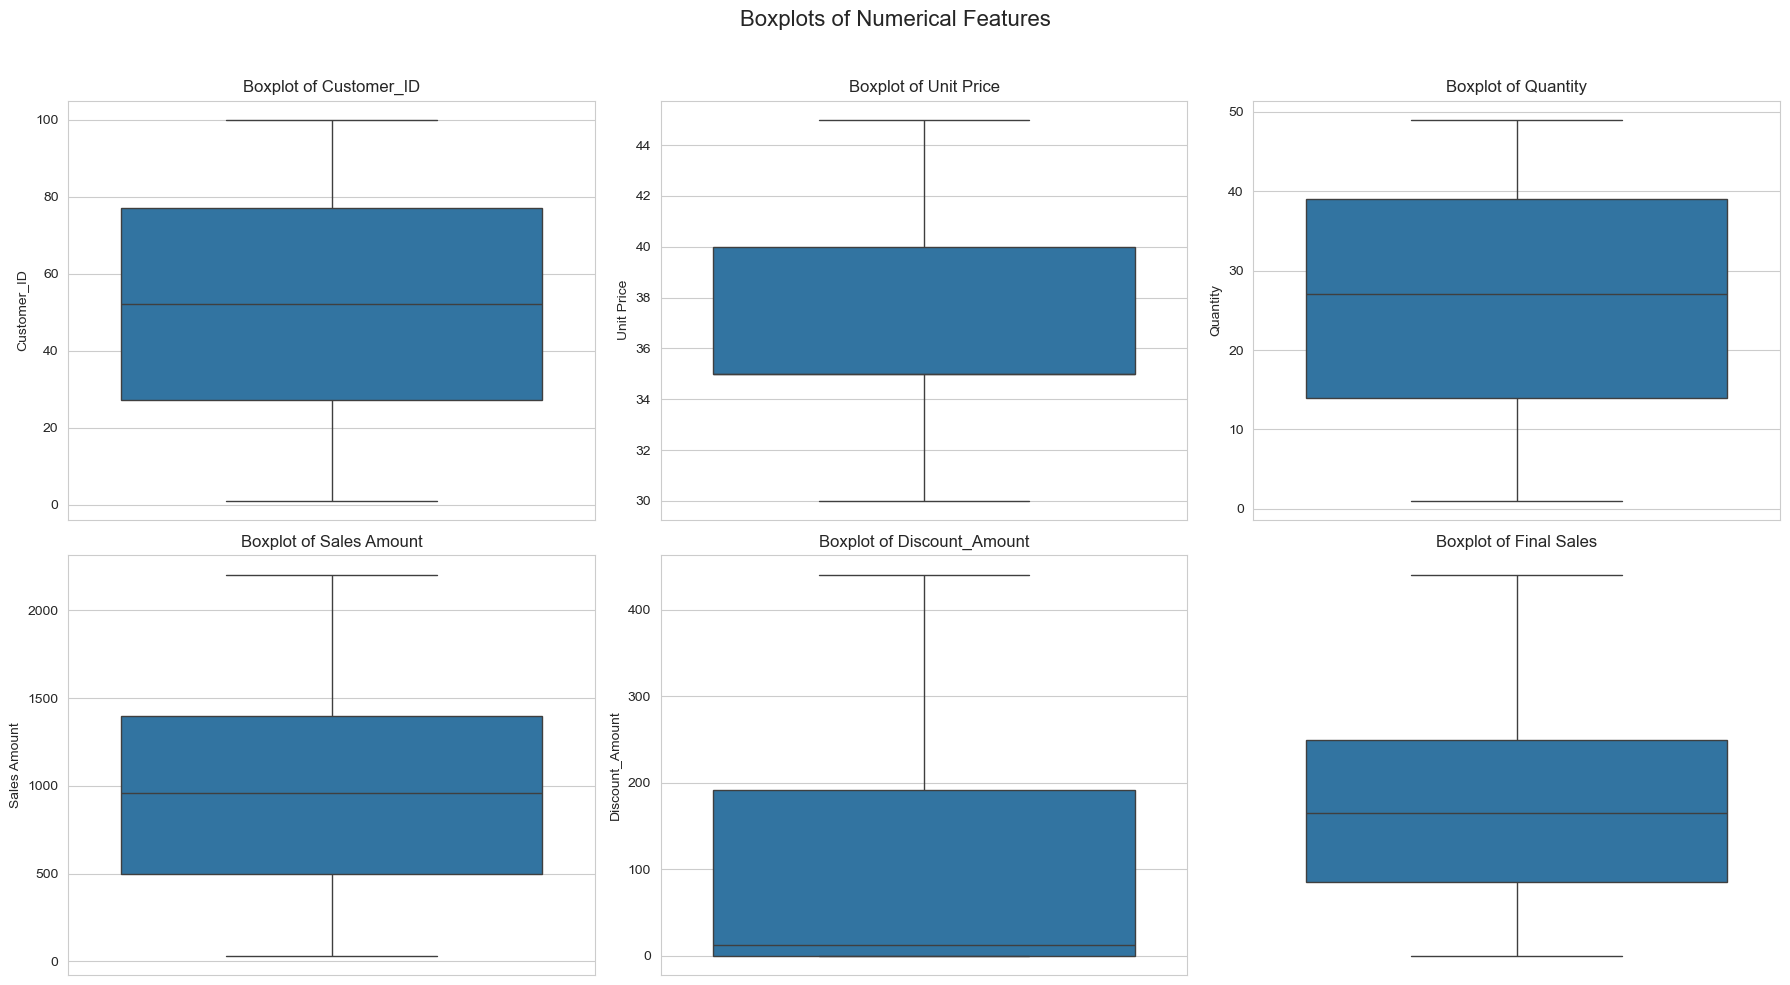

In [20]:
# Plot boxplots for numerical columns to check for outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Numerical Features", fontsize=16)

for i, col in enumerate(num):
    row, col_pos = divmod(i, 3)
    sns.boxplot(y=df[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f"Boxplot of {col}")

# Hide empty subplot
axes[1, 2].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


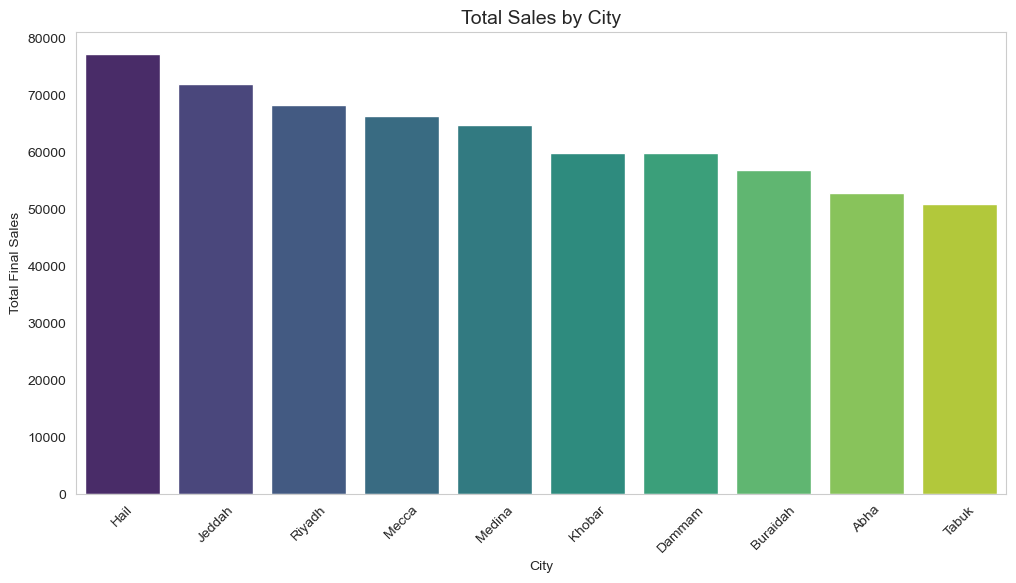

In [49]:
# Aggregate sales by city
city_sales = df.groupby("City")["Final Sales"].sum().sort_values(ascending=False)

# Plot city-wise sales distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette="viridis")
plt.title("Total Sales by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Total Final Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


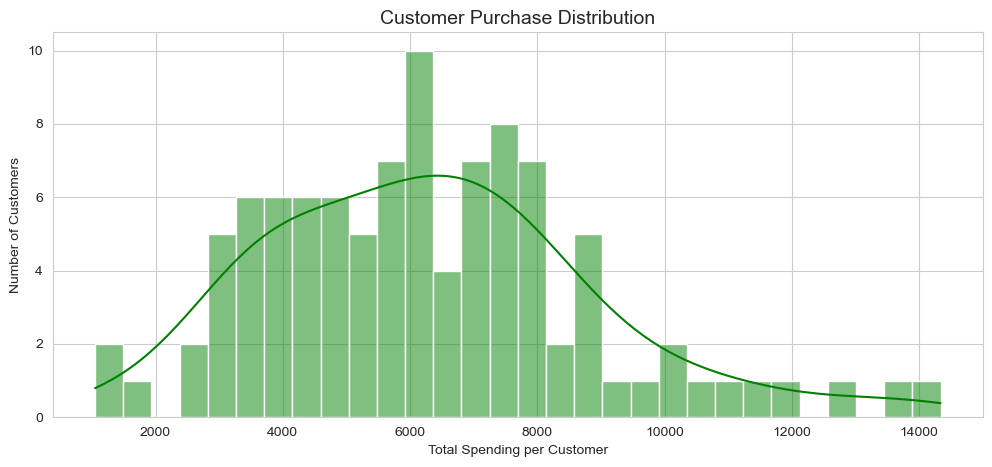

In [50]:
# Aggregate sales per customer
customer_sales = df.groupby("Customer_ID")["Final Sales"].sum()

# Plot customer purchase distribution
plt.figure(figsize=(12, 5))
sns.histplot(customer_sales, bins=30, kde=True, color="g")
plt.title("Customer Purchase Distribution", fontsize=14)
plt.xlabel("Total Spending per Customer")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()


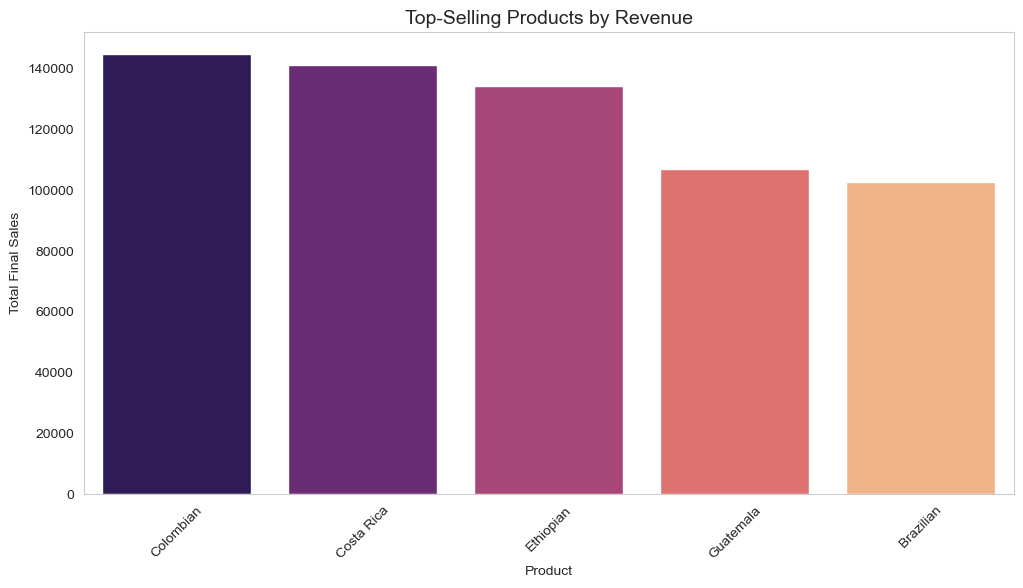

In [51]:
# Aggregate sales by product
product_sales = df.groupby("Product")["Final Sales"].sum().sort_values(ascending=False)

# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="magma")
plt.title("Top-Selling Products by Revenue", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Total Final Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


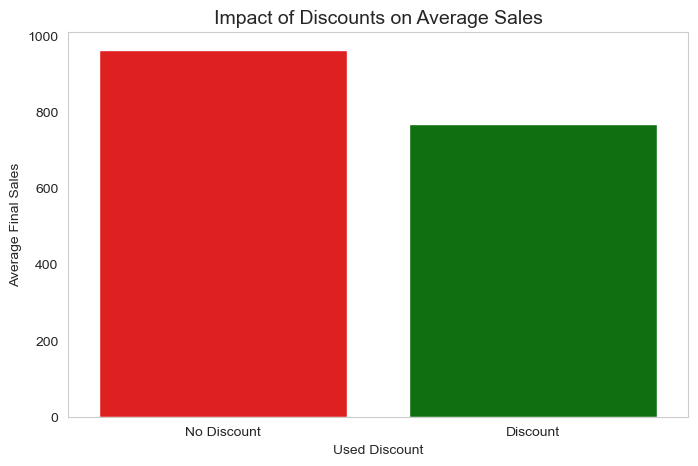

In [52]:
# Compare average sales with and without discounts
discount_effect = df.groupby("Used_Discount")["Final Sales"].mean()

# Plot discount impact on sales
plt.figure(figsize=(8, 5))
sns.barplot(x=discount_effect.index, y=discount_effect.values, palette=["red", "green"])
plt.xticks(ticks=[0, 1], labels=["No Discount", "Discount"])
plt.title("Impact of Discounts on Average Sales", fontsize=14)
plt.xlabel("Used Discount")
plt.ylabel("Average Final Sales")
plt.grid(axis="y")
plt.show()


# time analysis


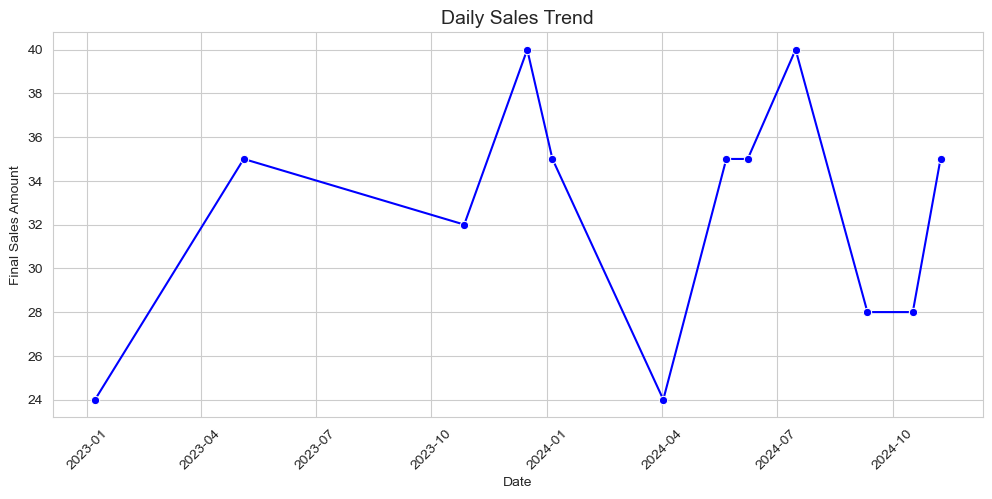

In [45]:
# Aggregate daily sales
daily_sales = df.groupby("Date")["Final Sales"].sum()

# Plot daily sales trend
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker="o", color="b")
plt.title("Daily Sales Trend", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Final Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


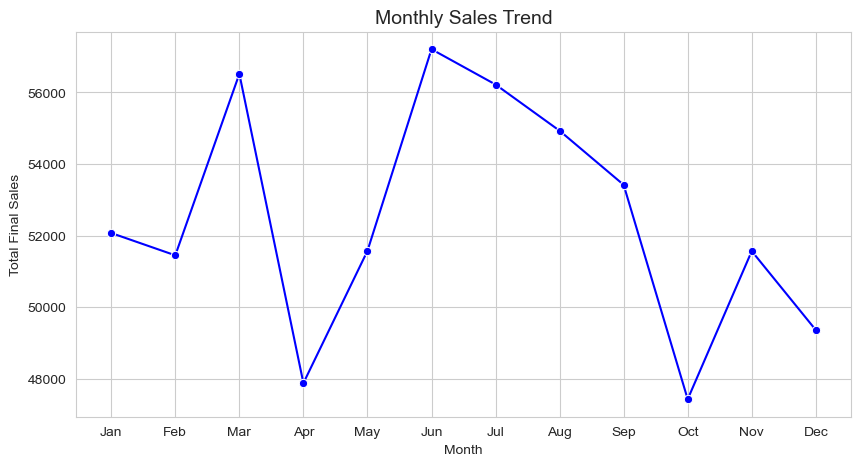

In [60]:
# Extract month from Date column
df["Month"] = df["Date"].dt.month

# Aggregate monthly sales
monthly_sales = df.groupby("Month")["Final Sales"].sum()

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="b")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Final Sales")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(True)
plt.show()


  File "\\?\C:\Users\HOss\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HOss\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HOss\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\HOss\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


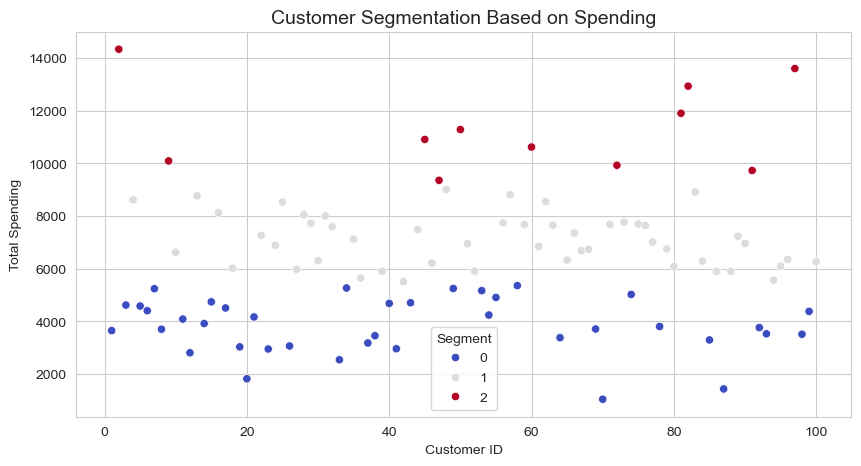

In [54]:
from sklearn.cluster import KMeans

# Prepare data for clustering (Customer ID and Total Sales)
customer_spending = df.groupby("Customer_ID")["Final Sales"].sum().reset_index()

# Apply K-Means Clustering (Choosing 3 segments: Low, Medium, High spenders)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_spending["Cluster"] = kmeans.fit_predict(customer_spending[["Final Sales"]])

# Plot customer segmentation
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_spending["Customer_ID"], y=customer_spending["Final Sales"], hue=customer_spending["Cluster"], palette="coolwarm")
plt.title("Customer Segmentation Based on Spending", fontsize=14)
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.legend(title="Segment")
plt.grid(True)
plt.show()


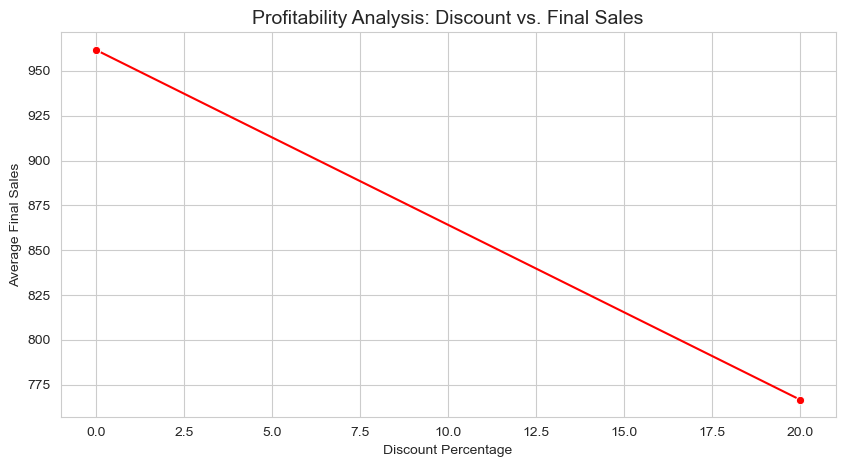

In [56]:
# Calculate discount percentage
df["Discount_Percentage"] = (df["Discount_Amount"] / df["Sales Amount"]) * 100

# Aggregate profit impact
discount_impact = df.groupby("Discount_Percentage")["Final Sales"].mean()

# Plot profit impact of discounts
plt.figure(figsize=(10, 5))
sns.lineplot(x=discount_impact.index, y=discount_impact.values, marker="o", color="r")
plt.title("Profitability Analysis: Discount vs. Final Sales", fontsize=14)
plt.xlabel("Discount Percentage")
plt.ylabel("Average Final Sales")
plt.grid(True)
plt.show()


# ML

In [64]:
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales,Discount_Percentage,Month,Year,Month_Name,Day_Name
0,2023-01-01,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560,0.0,1,2023,January,Sunday
1,2023-01-02,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595,0.0,1,2023,January,Monday
2,2023-01-03,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665,0.0,1,2023,January,Tuesday
3,2023-01-04,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45,0.0,1,2023,January,Wednesday
4,2023-01-05,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472,20.0,1,2023,January,Thursday


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,
ExtraTreesRegressor,
GradientBoostingRegressor,
HistGradientBoostingRegressor,
StackingRegressor,
VotingRegressor,
AdaBoostRegressor,
BaggingRegressor)
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [82]:
# encode cate col
for col in cat.columns:
    label = LabelEncoder()
    df[col]=label.fit_transform(df[col])

In [89]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [90]:
df.columns 

Index(['date', 'customer_id', 'city', 'category', 'product', 'unit_price',
       'quantity', 'sales_amount', 'used_discount', 'discount_amount',
       'final_sales', 'discount_percentage', 'month', 'year', 'month_name',
       'day_name'],
      dtype='object')

In [91]:
# split data to target and featuress
X= df.drop(columns='final_sales')
y=df['final_sales']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Define scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}


In [96]:
# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "Bagging": BaggingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

In [103]:
# Dictionary to store results
results = {}

# Iterate through each scaler and model separately
for scaler_name, scaler in scalers.items():  # Iterate through scalers
    for model_name, model in models.items():  # Iterate through models
        pipeline = Pipeline([
            ("scaler", scaler),   # Apply one scaler at a time
            ("regressor", model)  # Apply one model at a time
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluate performance
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        r2 = r2_score(y_test, y_pred)  # Calculate R² Score

        # Store results
        results[(scaler_name, model_name)] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}


In [104]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
results_df.sort_values(by="RMSE")  # Sort by RMSE to find the best model

,,MAE,RMSE,R² Score
MinMaxScaler,Linear Regression,2.626088e-13,3.515306e-13,1.000000
RobustScaler,Linear Regression,4.489073e-13,5.603762e-13,1.000000
StandardScaler,Linear Regression,6.357897e-13,7.756832e-13,1.000000
MinMaxScaler,Extra Trees,2.107397e+00,3.135945e+00,0.999956
RobustScaler,Extra Trees,2.107397e+00,3.135945e+00,0.999956
StandardScaler,Extra Trees,2.107397e+00,3.135945e+00,0.999956
RobustScaler,Bagging,5.644178e+00,8.909014e+00,0.999646
StandardScaler,Bagging,5.629932e+00,8.928439e+00,0.999645
MinMaxScaler,Bagging,5.690822e+00,8.948946e+00,0.999643
RobustScaler,Random Forest,5.678288e+00,9.040734e+00,0.999636


In [105]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Sort by RMSE (lower is better)
best_by_rmse = results_df.sort_values(by="RMSE").head(1)

# Sort by R² Score (higher is better)
best_by_r2 = results_df.sort_values(by="R² Score", ascending=False).head(1)

print("Best Model Based on RMSE:\n", best_by_rmse)
print("\nBest Model Based on R² Score:\n", best_by_r2)


Best Model Based on RMSE:
                                          MAE          RMSE  R² Score
MinMaxScaler Linear Regression  2.626088e-13  3.515306e-13       1.0

Best Model Based on R² Score:
                                            MAE          RMSE  R² Score
StandardScaler Linear Regression  6.357897e-13  7.756832e-13       1.0
